# Import the libraries

In [99]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, roc_auc_score, classification_report
from sklearn.preprocessing import StandardScaler

# Load the data

In [100]:
breast_cancer = load_breast_cancer()
X = pd.DataFrame(breast_cancer.data, columns = breast_cancer.feature_names)
y = pd.DataFrame(breast_cancer.target)

print(X.shape)

print("Data is loaded !")

print("Target Distribution:\n", y.value_counts(normalize=True))

(569, 30)
Data is loaded !
Target Distribution:
 0
1    0.627417
0    0.372583
Name: proportion, dtype: float64


# Splitting the Dataset

In [101]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

print("The data is splitted for among 80% for training set and the rest 20% for the testing set" )

The data is splitted for among 80% for training set and the rest 20% for the testing set


# Exploratory Data Analysis

In [102]:
print(X.head())
print(X.describe())

   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst radius  worst texture  worst perimeter  \
0           

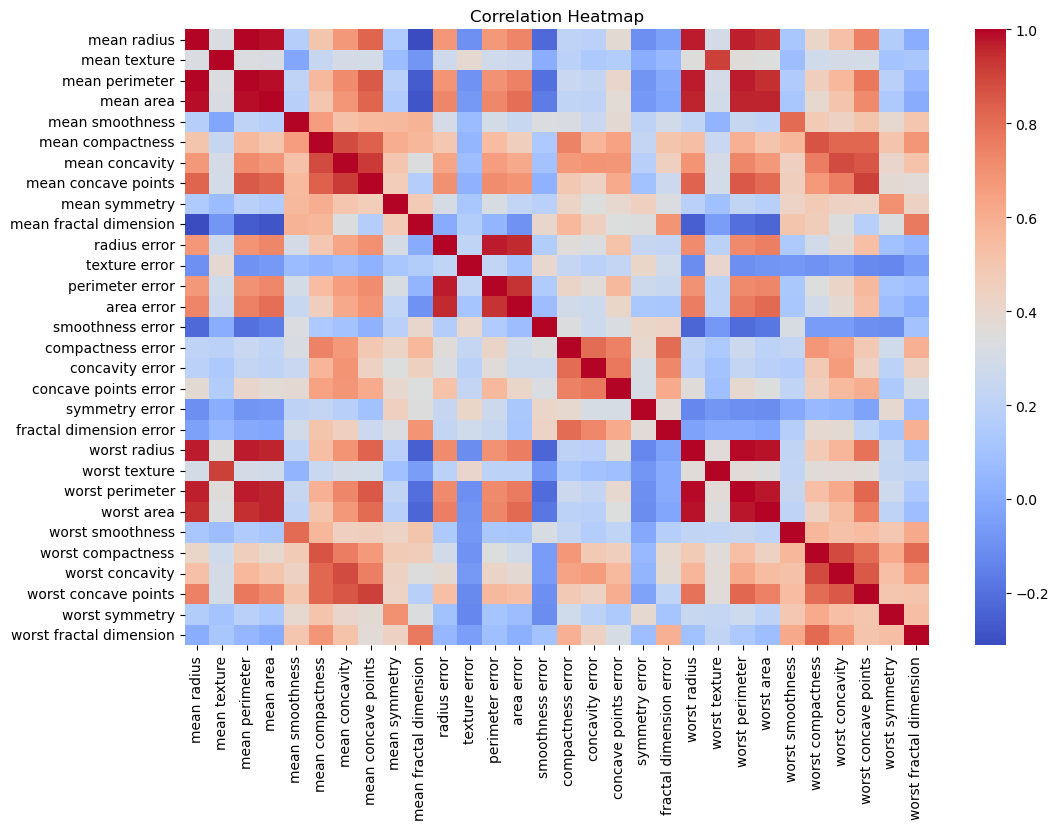

In [103]:
plt.figure(figsize=(12,8))
sns.heatmap(X.corr(), cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

# Scaling the Data

In [104]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train,y_train)
X_test_scaled = scaler.transform(X_test)

# Applying the Model

In [105]:
knn = KNeighborsClassifier(n_neighbors=6)

knn.fit(X_train_scaled, y_train)

pred = knn.predict(X_test_scaled)

C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


# Evaluating the Model

In [106]:
accuracy = accuracy_score( y_test, pred)
print(f"Accuracy Score: {accuracy:.4f}")

Accuracy Score: 0.9912


In [107]:
print("Classification Matrix: \n:", classification_report(y_test, pred, target_names=[str(i) for i in breast_cancer.target_names])) 

Classification Matrix: 
:               precision    recall  f1-score   support

   malignant       1.00      0.98      0.99        52
      benign       0.98      1.00      0.99        62

    accuracy                           0.99       114
   macro avg       0.99      0.99      0.99       114
weighted avg       0.99      0.99      0.99       114



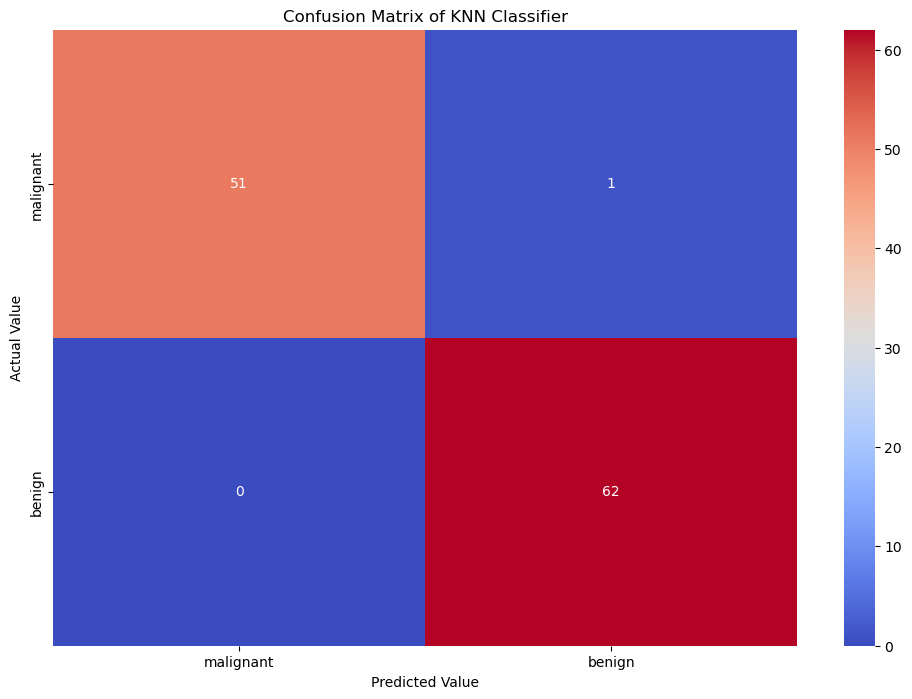

In [108]:
cm = confusion_matrix(y_test, pred)

plt.figure(figsize = (12,8))
sns.heatmap(cm, xticklabels= breast_cancer.target_names, yticklabels = breast_cancer.target_names, annot=True, cmap = 'coolwarm')
plt.title("Confusion Matrix of KNN Classifier")
plt.xlabel("Predicted Value")
plt.ylabel("Actual Value")

plt.show()